In [1]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

Using TensorFlow backend.


In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
%matplotlib inline

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape) 
print(x_test.shape) 

(60000, 784)
(10000, 784)


In [4]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)


In [5]:

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [6]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [7]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [9]:
# del autoencoder

In [10]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.3555 - val_loss: 0.2716
Epoch 2/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.2642 - val_loss: 0.2530
Epoch 3/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.2427 - val_loss: 0.2304
Epoch 4/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.2224 - val_loss: 0.2120
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2068 - val_loss: 0.1993
Epoch 6/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.1962 - val_loss: 0.1903
Epoch 7/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.1883 - val_loss: 0.1832
Epoch 8/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.1818 - val_loss: 0.1770
Epoch 9/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.1760 - val_loss: 0.1717
E

In [11]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

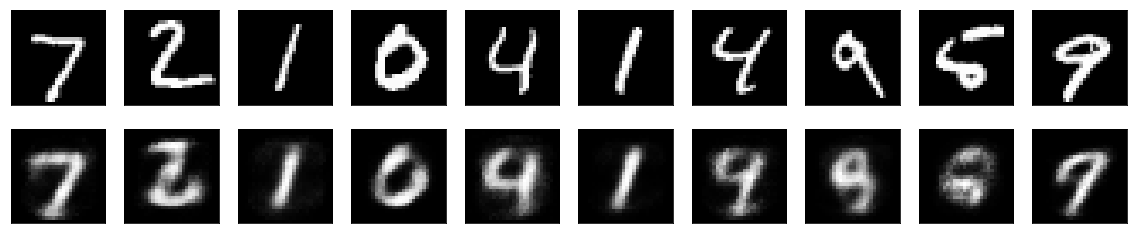

In [12]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
from keras import losses
import tensorflow as tf

sess=tf.Session()
sess.run(tf.global_variables_initializer())

# in order to use binary_crossentropy in keras.losses array need convert to tensor
original_data = tf.convert_to_tensor(x_test)
decoded_data = tf.convert_to_tensor(decoded_imgs)

loss_data = losses.binary_crossentropy(original_data, decoded_data)
val_loss = loss_data.eval(session=sess)

SyntaxError: invalid syntax (<ipython-input-13-d1127e890d4d>, line 12)

In [14]:
loss_sorted = []
for i in range(len(val_loss)):
    loss_sorted.append({'loss': val_loss[i], 'index': i})

NameError: name 'val_loss' is not defined

In [22]:
loss_sorted.sort(key = lambda x: x['loss'], reverse = True)

In [23]:
loss_sorted

[{'loss': 0.5081608, 'index': 6085},
 {'loss': 0.501283, 'index': 1790},
 {'loss': 0.46616894, 'index': 6065},
 {'loss': 0.4658084, 'index': 7845},
 {'loss': 0.465345, 'index': 7871},
 {'loss': 0.46374473, 'index': 8015},
 {'loss': 0.46027002, 'index': 8115},
 {'loss': 0.44984055, 'index': 7919},
 {'loss': 0.44742316, 'index': 9596},
 {'loss': 0.44627726, 'index': 8254},
 {'loss': 0.44277814, 'index': 7853},
 {'loss': 0.43389782, 'index': 6139},
 {'loss': 0.42007136, 'index': 222},
 {'loss': 0.4182443, 'index': 3364},
 {'loss': 0.41495624, 'index': 7926},
 {'loss': 0.4136508, 'index': 998},
 {'loss': 0.40772498, 'index': 9078},
 {'loss': 0.4073172, 'index': 6103},
 {'loss': 0.40618563, 'index': 6794},
 {'loss': 0.39998075, 'index': 4960},
 {'loss': 0.39907154, 'index': 4086},
 {'loss': 0.3935835, 'index': 437},
 {'loss': 0.3842745, 'index': 9110},
 {'loss': 0.37996697, 'index': 9128},
 {'loss': 0.37721738, 'index': 864},
 {'loss': 0.3700689, 'index': 8330},
 {'loss': 0.36878374, 'index

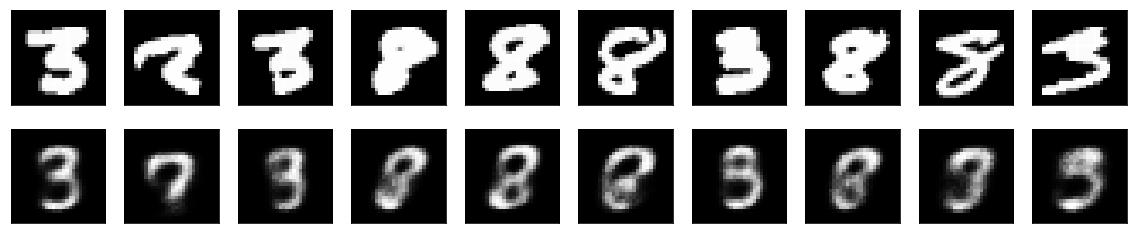

In [39]:
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[loss_sorted[i]['index']].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[loss_sorted[i]['index']].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

NameError: name 'x_train' is not defined